In [1]:
import astropy.io.fits as fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import astropy.table
from astropy.table import Table



In [2]:
hdr1 = fits.open("EUC_MER_FINAL-CAT_concatenated.fits")
hdr2 = fits.open("EUC_MER_FINAL-MORPH_concatenated.fits")


ra_euclid=hdr1[1].data["RIGHT_ASCENSION"]
dec_euclid=hdr1[1].data["DECLINATION"]

concentration_euclid = hdr2[1].data["CONCENTRATION"]
asymmetry_euclid = hdr2[1].data["ASYMMETRY"]
smoothness_euclid = hdr2[1].data["SMOOTHNESS"]
gini_euclid = hdr2[1].data["GINI"]
moment_20_euclid = hdr2[1].data["MOMENT_20"]

hdr1.close()
hdr2.close()

print(len(ra_euclid), len(concentration_euclid))



623525 623525


In [3]:
# read CAS table from COSMOS data

file = open('cosmos_morph_zamojski_1.0.tbl')
data_cosmos=file.readlines()
file.close()

mag_cosmo=np.zeros(len(data_cosmos[3:]),dtype=np.float32)

for i in range(3,len(data_cosmos[3:])):
    fields=data_cosmos[i].split()
    mag_cosmo[i-3] = fields[13]

mask = mag_cosmo[:]<24.5
ra_cosmos=np.zeros(len(mask),dtype=np.float32)
dec_cosmos=np.zeros(len(mask),dtype=np.float32)
c_cosmos=np.zeros(len(mask),dtype=np.float32)
a_cosmos=np.zeros(len(mask),dtype=np.float32)
s_cosmos=np.zeros(len(mask),dtype=np.float32)
gini_cosmos=np.zeros(len(mask),dtype=np.float32)
m20_cosmos=np.zeros(len(mask),dtype=np.float32)

#ra_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)
#dec_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)
#c_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)
#a_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)
#s_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)
#gini_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)
#m20_cosmos=np.zeros(len(data_cosmos[3:]),dtype=np.float32)

print(data_cosmos[3], data_cosmos[4])
iter=0
for i in range(3,len(data_cosmos[3:])):
    fields=data_cosmos[i].split()
    if mag_cosmo[i]<24.5:
        ra_cosmos[iter],dec_cosmos[iter] = fields[1],fields[2]
        c_cosmos[iter],a_cosmos[iter],s_cosmos[iter]= fields[17],fields[18],fields[19]
        gini_cosmos[iter],m20_cosmos[iter] = fields[20],fields[21]
        iter=iter+1
#print(len(data_cosmos),len(ra_cosmos),ra_cosmos[0],dec_cosmos[0],ra_cosmos[1],dec_cosmos[1], )




       52333        150.73950        1.6246840        1183.3100        3551.8800       21.5600   -0.00048015900     0.0057991700       13.0829      0.017397500       13          567       54.3246       21.7833       3.42167       6.38138       9.40609       2.19585      0.270124     0.0849890      0.441227      -1.56491      0.299412     0.0506053       1.79178       1.15245       1.17196       1.18745       1.21414
        52395        150.72887        1.6233180        1948.5000        3454.5000       22.6000   -0.00043941900     0.0058213900       9.96699      0.013165300        9          358       22.2268       22.7536       2.39550       4.40499       7.49363       2.47648      0.456041      0.127130      0.493669      -1.48290      0.483533     0.0841464       1.13693      0.660443      0.735677      0.752013      0.753110



In [4]:
import astropy.units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=ra_euclid*u.degree, dec=dec_euclid*u.degree)

catalog = SkyCoord(ra=ra_cosmos*u.degree, dec=dec_cosmos*u.degree)

idx, d2d, d3d = c.match_to_catalog_sky(catalog)




In [5]:
#print(len(idx[d2d<1*u.arcsecond]), idx[d2d<1*u.arcsecond])
#print(concentration_euclid[d2d<1*u.arcsecond], c_cosmos[idx[d2d<1*u.arcsecond]])
#print(asymmetry_euclid[d2d<1*u.arcsecond], a_cosmos[idx[d2d<1*u.arcsecond]])

c1 = SkyCoord(ra=149.92553157860326*u.degree, dec=2.4471503399388523*u.degree)
idx_c1, d2d_c1, d3d_c1 = c1.match_to_catalog_sky(catalog)
print(c_cosmos[idx_c1])
print( a_cosmos[idx_c1])

2.63516
0.392282


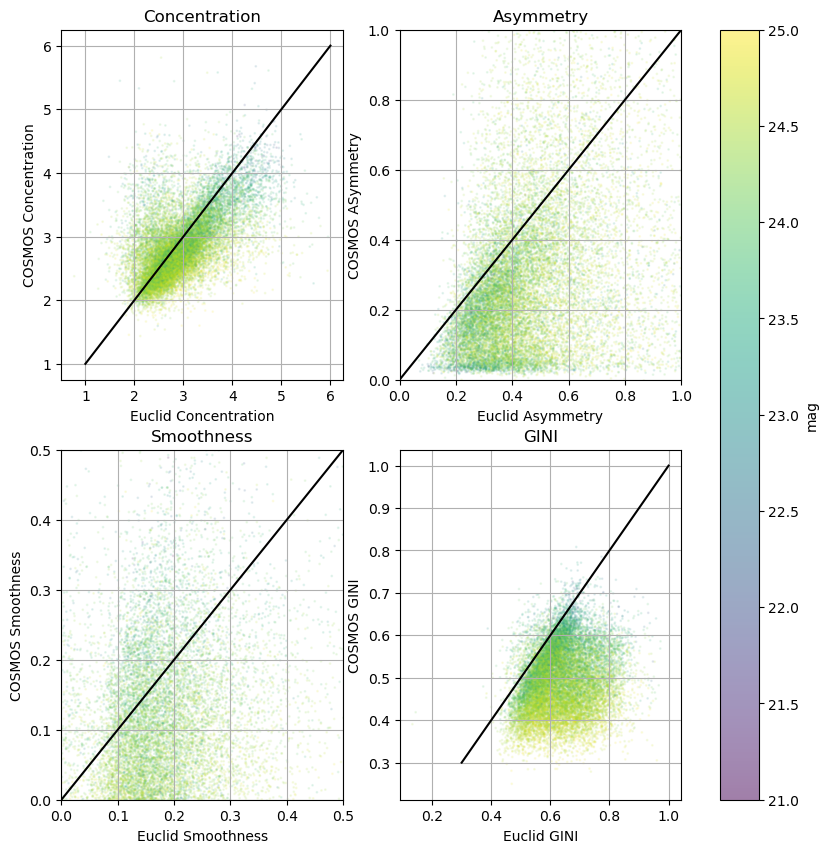

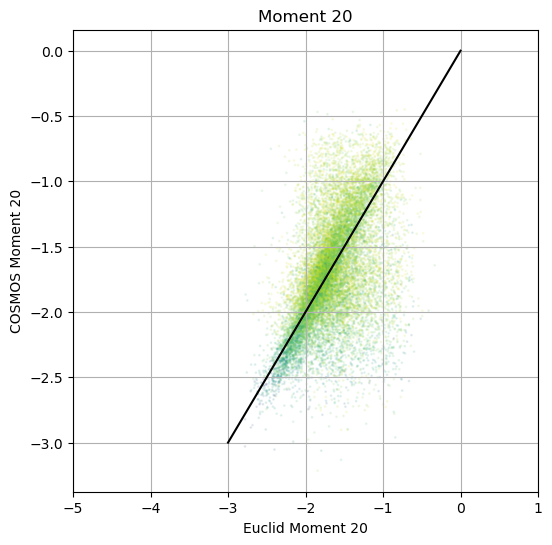

In [9]:
from matplotlib.colors import Normalize

cmap1 = plt.colormaps["viridis"]
plt.cm.ScalarMappable(norm=Normalize(21, 25), cmap=cmap1)

fig, axs = plt.subplots(2,2, figsize=[10,10])
axs[0,0].scatter(concentration_euclid[d2d<1*u.arcsecond], 
                 c_cosmos[idx[d2d<1*u.arcsecond]],
                 c=mag_cosmo[idx[d2d<1*u.arcsecond]],
                 cmap=cmap1, s=1,alpha=0.1)
axs[0,0].plot([1,2,3,4,5,6],[1,2,3,4,5,6],'k-')
axs[0,0].grid(True)

axs[0,0].set_title("Concentration")
axs[0,0].set_xlabel("Euclid Concentration")
axs[0,0].set_ylabel("COSMOS Concentration")

axs[0,1].scatter(asymmetry_euclid[d2d<1*u.arcsecond], 
                 a_cosmos[idx[d2d<1*u.arcsecond]],
                 c=mag_cosmo[idx[d2d<1*u.arcsecond]], 
                 cmap=cmap1,s=1,alpha=0.1)
axs[0,1].plot([0,1],[0,1],'k-')
axs[0,1].set_title("Asymmetry")
axs[0,1].set(xlim=(0, 1), ylim=(0, 1))
axs[0,1].set_xlabel("Euclid Asymmetry")
axs[0,1].set_ylabel("COSMOS ASymmetry")
axs[0,1].grid(True)

axs[1,0].scatter(smoothness_euclid[d2d<1*u.arcsecond], 
                 s_cosmos[idx[d2d<1*u.arcsecond]],
                 c=mag_cosmo[idx[d2d<1*u.arcsecond]], 
                 cmap=cmap1,s=1,alpha=0.1)
axs[1,0].plot([0,0.8],[0,0.8],'k-')
axs[1,0].set_title("Smoothness")
axs[1,0].set(xlim=(0, 0.5), ylim=(0, 0.5))

axs[1,0].set_xlabel("Euclid Smoothness")
axs[1,0].set_ylabel("COSMOS Smoothness")
axs[1,0].grid(True)

axs[1,1].scatter(gini_euclid[d2d<1*u.arcsecond], 
                 gini_cosmos[idx[d2d<1*u.arcsecond]],
                 c=mag_cosmo[idx[d2d<1*u.arcsecond]], 
                 cmap=cmap1,s=1,alpha=0.1)
axs[1,1].plot([0.3,1],[0.3,1],'k-')
axs[1,1].set_title("GINI")
axs[1,1].set_xlabel("Euclid GINI")
axs[1,1].set_ylabel("COSMOS GINI")
axs[1,1].grid(True)
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(21, 25)), cmap=cmap1,
             ax=axs, label="mag", alpha=0.5)

plt.savefig("CAS_GINI_cosmos-vs-euclid_24.5.png",dpi=150)
plt.show()

fig, axs = plt.subplots(1,1, figsize=[6,6])
axs.scatter(moment_20_euclid[d2d<1*u.arcsecond], 
            m20_cosmos[idx[d2d<1*u.arcsecond]],
            c=mag_cosmo[idx[d2d<1*u.arcsecond]], 
            cmap=cmap1,s=1,alpha=0.1)
axs.plot([-3,0],[-3,0],'k-')
axs.set_title("Moment 20")
axs.set(xlim=(-5, 1))
axs.set_xlabel("Euclid Moment 20")
axs.set_ylabel("COSMOS Moment 20")
axs.grid(True)
plt.savefig("M20_cosmos-vs-euclid_24.5.png",dpi=150)
plt.show()
